In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# load data
data_wine_white = pd.read_csv("data/winequality-white.csv", sep=";")
data_wine_red = pd.read_csv("data/winequality-red.csv", sep=";")

# add type column
# white = 0, red = 1
data_wine_white["type"] = 0
data_wine_red["type"] = 1

# concat data frames
data = pd.concat([data_wine_white, data_wine_red])

# reset indices
data = data.reset_index()
del data["index"]

# separate x and y
feature_list = list(data)
feature_list.remove("type")
x = data[feature_list]
y = data[["type"]]

# split train and test data, allotting 40% of the data to test data.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=0)

'''
    Decision Tree is a machine learning algorithm which splits the data into a decision
rules that finally lead to leaf nodes, where it determines the categorical prediction
of a sample.
'''
# train decision tree
decision_tree = DecisionTreeClassifier()
train_x_df = pd.DataFrame(train_x, columns=feature_list)
decision_tree.fit(train_x_df, train_y)

# predict from the test set
test_x_df = pd.DataFrame(test_x, columns=feature_list)
y_hat = decision_tree.predict(test_x_df)

# we will now compute for the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, y_hat)
# Confusion matrix outputs [[TP, FN],[FP, TN]]
# Results are:
# TP = 1916
# FP = 57
# TN = 521
# FN = 105
n_samples = sum(sum(confusion_matrix))
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / n_samples
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
specificity = confusion_matrix[1, 1]/(confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("Accuracy: " + str(accuracy))
print("Sensitivity: " + str(sensitivity))
print("Specificity: " + str(specificity))

Accuracy: 0.9799923047325895
Sensitivity: 0.9873289406994424
Specificity: 0.9568690095846646


In [2]:
confusion_matrix


array([[1948,   25],
       [  27,  599]], dtype=int64)

In [3]:
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'export_graphviz' is not defined

In [4]:
from six import StringIO

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [6]:
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'dot_data' is not defined

In [7]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# load data
data_wine_white = pd.read_csv("data/winequality-white.csv", sep=";")
data_wine_red = pd.read_csv("data/winequality-red.csv", sep=";")

# add type column
# white = 0, red = 1
data_wine_white["type"] = 0
data_wine_red["type"] = 1

# concat data frames
data = pd.concat([data_wine_white, data_wine_red])

# reset indices
data = data.reset_index()
del data["index"]

# separate x and y
feature_list = list(data)
feature_list.remove("type")
x = data[feature_list]
y = data[["type"]]

# split train and test data, allotting 40% of the data to test data.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=0)

'''
    Decision Tree is a machine learning algorithm which splits the data into a decision
rules that finally lead to leaf nodes, where it determines the categorical prediction
of a sample.
'''
# train decision tree
decision_tree = DecisionTreeClassifier()
train_x_df = pd.DataFrame(train_x, columns=feature_list)
decision_tree.fit(train_x_df, train_y)

# display decision tree
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# predict from the test set
test_x_df = pd.DataFrame(test_x, columns=feature_list)
y_hat = decision_tree.predict(test_x_df)

# we will now compute for the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, y_hat)
# Confusion matrix outputs [[TP, FN],[FP, TN]]
# Results are:
# TP = 1948
# FP = 27
# TN = 599
# FN = 25
n_samples = sum(sum(confusion_matrix))
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / n_samples
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
specificity = confusion_matrix[1, 1]/(confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("Accuracy: " + str(accuracy))
print("Sensitivity: " + str(sensitivity))
print("Specificity: " + str(specificity))

# Results:
# Accuracy: 0.9799923047325895
# Sensitivity: 0.9873289406994424
# Specificity: 0.9568690095846646


Accuracy: 0.9788380146210081
Sensitivity: 0.9868220983274202
Specificity: 0.9536741214057508


In [2]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
img = Image(graph.create_png())


TypeError: Image data of dtype object cannot be converted to float

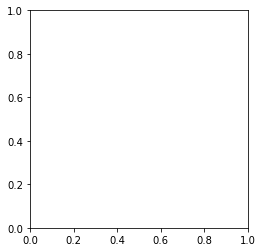

In [3]:
plt.imshow(img)

In [4]:
img.dtype

AttributeError: 'Image' object has no attribute 'dtype'

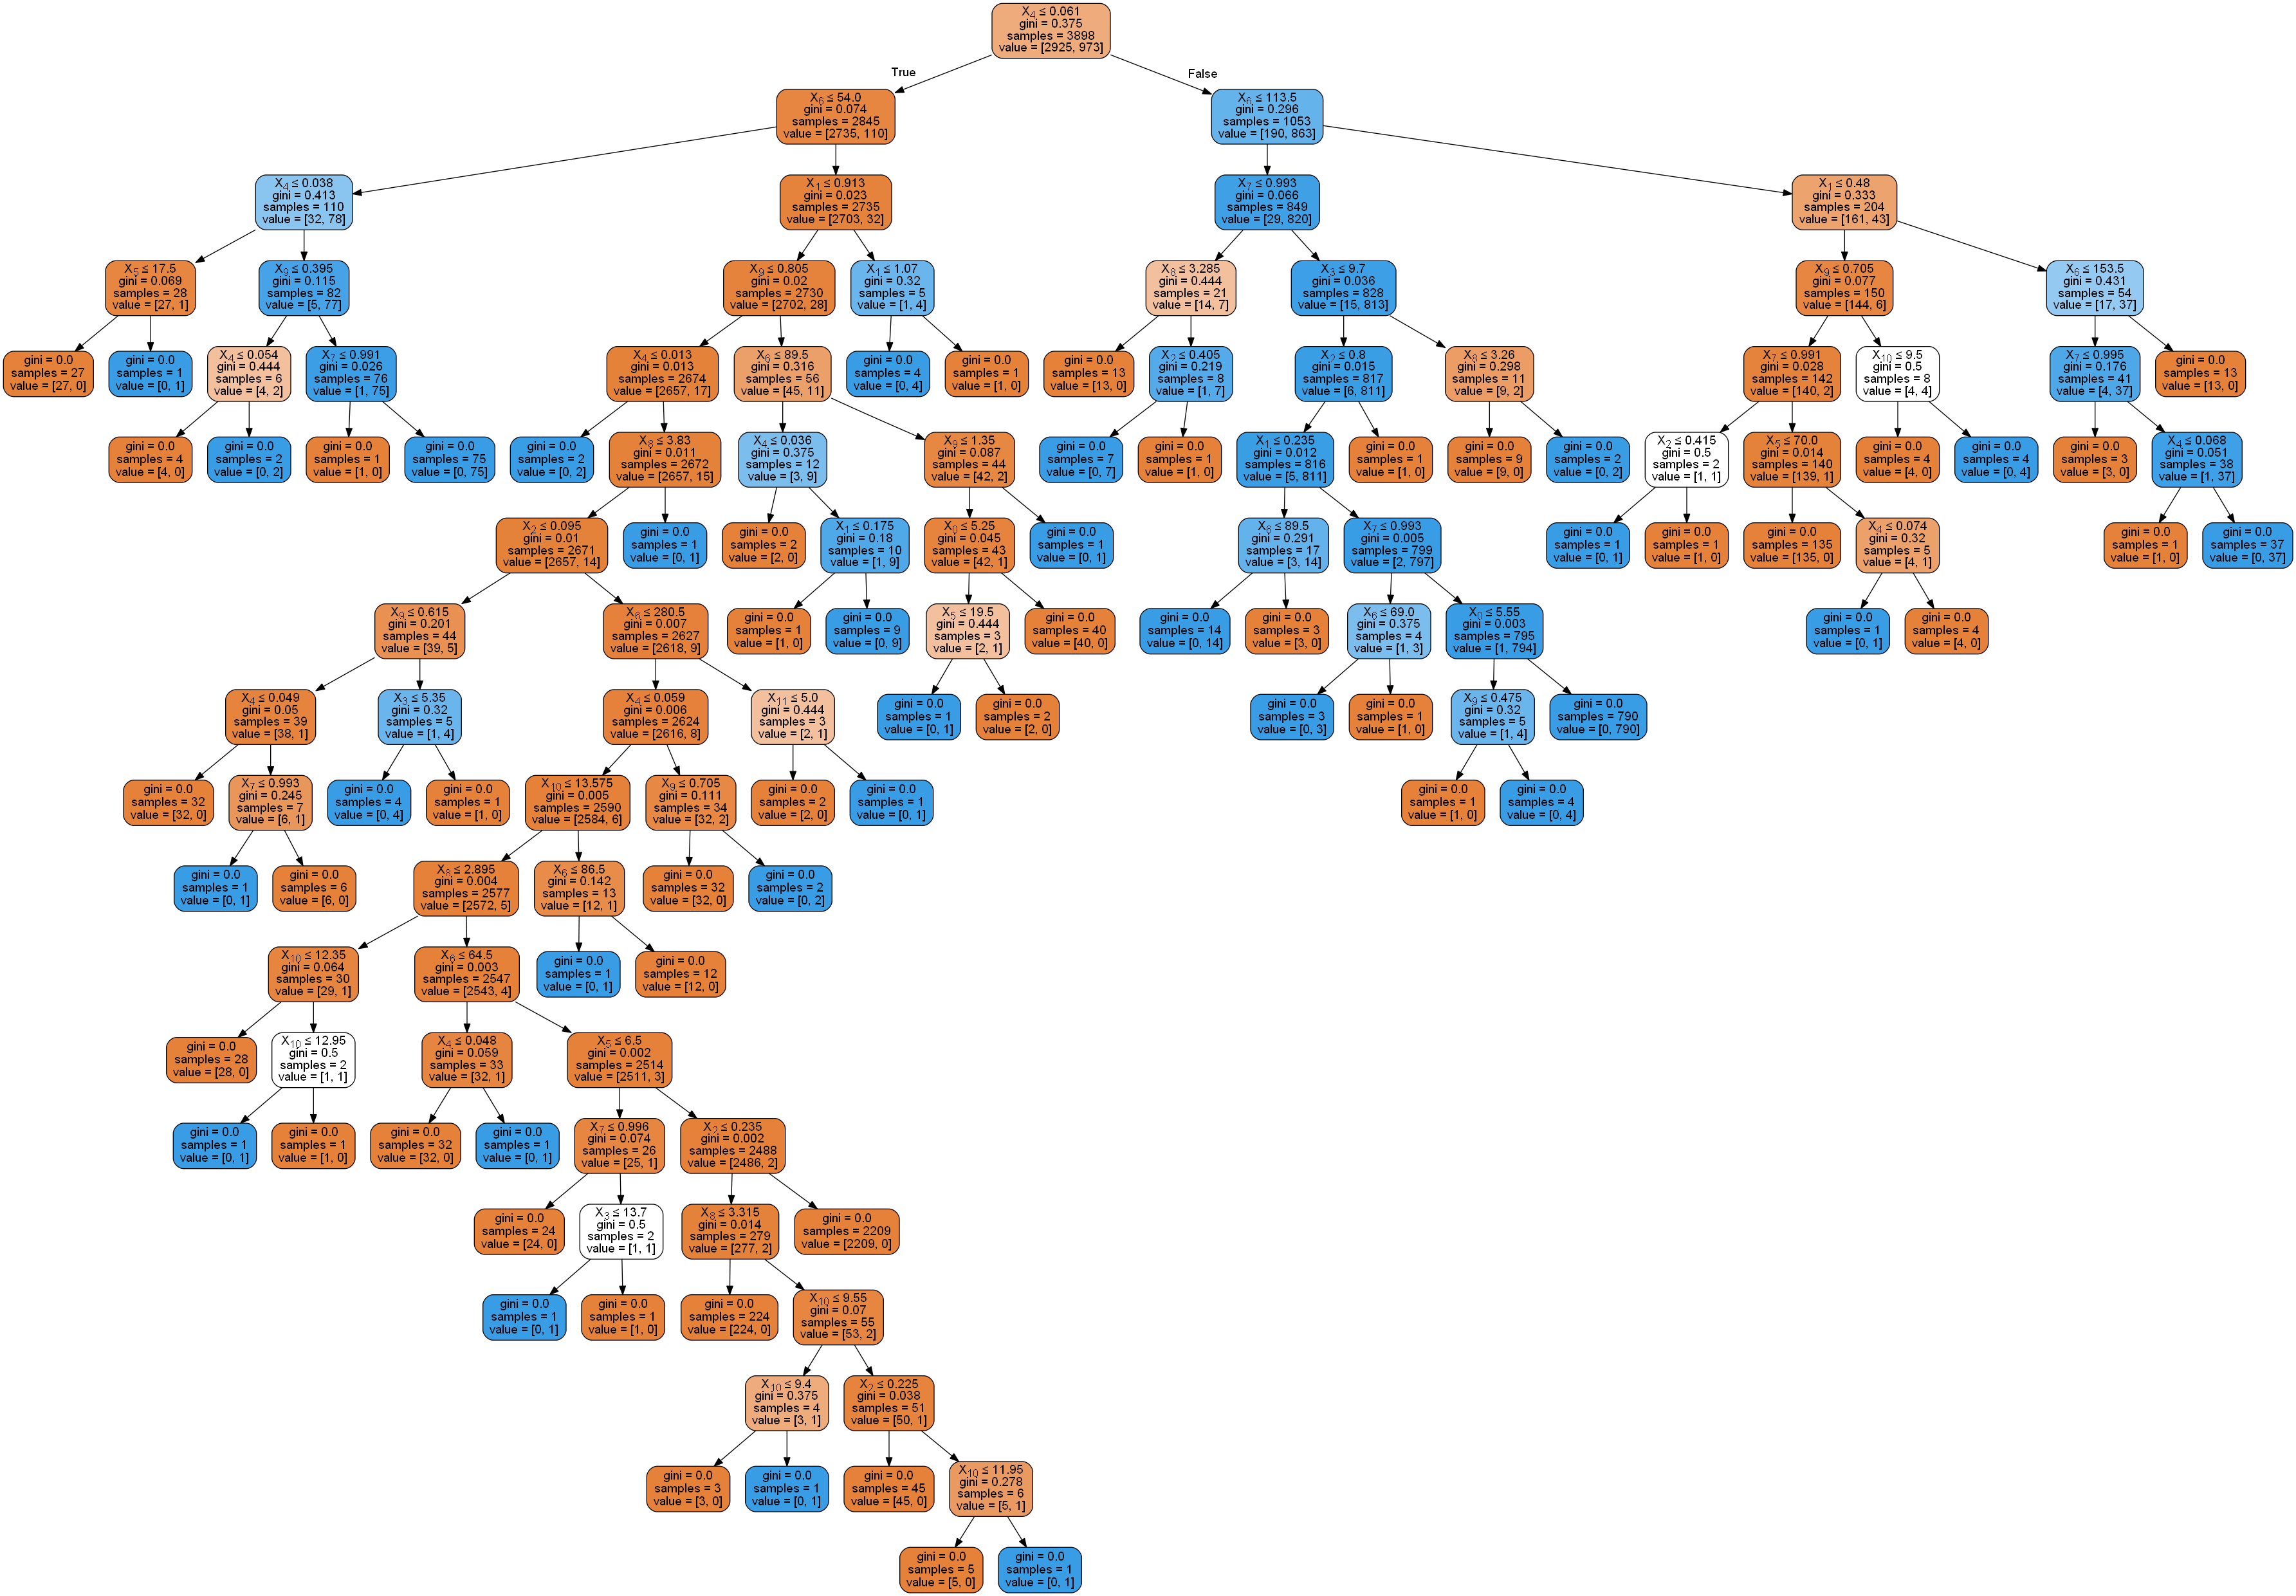

In [5]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# load data
data_wine_white = pd.read_csv("data/winequality-white.csv", sep=";")
data_wine_red = pd.read_csv("data/winequality-red.csv", sep=";")

# add type column
# white = 0, red = 1
data_wine_white["type"] = 0
data_wine_red["type"] = 1

# concat data frames
data = pd.concat([data_wine_white, data_wine_red])

# reset indices
data = data.reset_index()
del data["index"]

# separate x and y
feature_list = list(data)
feature_list.remove("type")
x = data[feature_list]
y = data[["type"]]

# split train and test data, allotting 40% of the data to test data.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=0)

'''
    Decision Tree is a machine learning algorithm which splits the data into a decision
rules that finally lead to leaf nodes, where it determines the categorical prediction
of a sample.
'''
# train decision tree
decision_tree = DecisionTreeClassifier()
train_x_df = pd.DataFrame(train_x, columns=feature_list)
decision_tree.fit(train_x_df, train_y)

# display decision tree (in jupyter notebook)
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# predict from the test set
test_x_df = pd.DataFrame(test_x, columns=feature_list)
y_hat = decision_tree.predict(test_x_df)

# we will now compute for the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, y_hat)
print(confusion_matrix)
# Confusion matrix outputs [[TP, FN],[FP, TN]]
# Results are:
# TP = 1948
# FP = 27
# TN = 599
# FN = 25
n_samples = sum(sum(confusion_matrix))
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / n_samples
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
specificity = confusion_matrix[1, 1]/(confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("Accuracy: " + str(accuracy))
print("Sensitivity: " + str(sensitivity))
print("Specificity: " + str(specificity))

# Results:
# Accuracy: 0.9788380146210081
# Sensitivity: 0.9868220983274202
# Specificity: 0.9536741214057508


[[1944   29]
 [  29  597]]
Accuracy: 0.9776837245094268
Sensitivity: 0.9853015712113533
Specificity: 0.9536741214057508
